In [12]:
!python.exe -m pip install --upgrade pip
# !pip install openpyxl

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


In [14]:
!pip install pandas

In [3]:
import glob
import pandas as pd
import numpy as np

In [7]:
filelists = glob.glob('./data20221108/*.*')
filelists

['./data20221108\\ohca_08xlsx.XLS',
 './data20221108\\ohca_09xlsx.XLS',
 './data20221108\\ohca_10xlsx.XLS',
 './data20221108\\ohca_11xlsx.XLS',
 './data20221108\\ohca_12xlsx.XLS',
 './data20221108\\ohca_13xlsx.XLS',
 './data20221108\\ohca_14xlsx.XLS',
 './data20221108\\ohca_15xlsx.XLS',
 './data20221108\\ohca_16xlsx.XLS',
 './data20221108\\ohca_17xlsx.XLS',
 './data20221108\\ohca_18xlsx.XLS',
 './data20221108\\ohca_19.xlsx',
 './data20221108\\ohca_20.xlsx']

In [9]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [10]:
dflists = [pd.read_excel(filename)  for filename in filelists]
sum([len(i) for i in dflists])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


355548

In [51]:
df = pd.concat(dflists)
len(df)

355548

In [52]:
a= np.unique(df.ER_RESULT)
b= np.zeros(8).astype('int8')
b[4] = 1
c = dict(zip(a,b))
c

{10: 0, 21: 0, 22: 0, 30: 0, 40: 1, 41: 0, 88: 0, 99: 0}

In [53]:
df['ER_RESULT'].replace(c,inplace=True)

In [54]:
np.unique(df['ER_RESULT'])

array([0, 1], dtype=int64)

In [55]:
df.describe(include='object').columns
df.drop(columns=df.describe(include='object').columns,inplace=True)

In [56]:
a = df.isnull().sum()>0
a[a].index
df.drop(columns=a[a].index, inplace=True)

In [57]:
df.drop(columns=['NUM','ER_ADM_DT','ER_ADM_TM','ER_DC_DT','ER_DC_TM','F_ADMINCODE','INS'], inplace=True)

In [136]:
df = df[df.AGE != 999]
df.head()

,YEAR,H_SEX,AGE,WITNESS,WITNESS_MAN,BYSTANDER_CPR,H_PLACE_PUBLIC,H_PLACE,ACT,CAUSE,ER_EKG,ER_DEFIB,ER_RESULT
0,2008,1,58,1,2,9,2,9,7,1,5,1,1
1,2008,2,47,2,2,9,2,9,7,1,5,2,1
2,2008,2,81,9,2,9,2,9,7,1,5,1,1
3,2008,2,64,1,9,9,1,8,99,2,9,1,1
4,2008,1,72,2,2,9,2,9,7,1,5,1,1


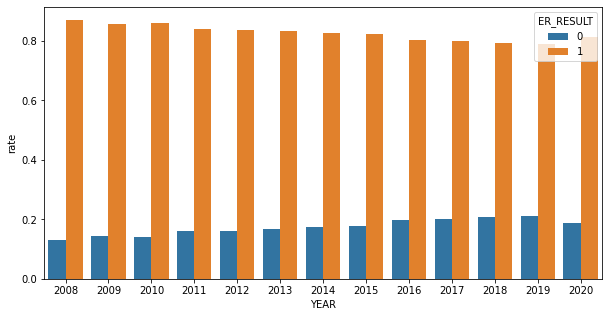

In [134]:
# 범주형 데이터 YEAR H_SEX AGE
#년도별 사망자 및 그외
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
temp = df.groupby(['YEAR','ER_RESULT'])['H_SEX'].count()
temp = temp.reset_index()
temp.columns = ['YEAR','ER_RESULT','COUNT']
temp['total'] = temp.groupby(['YEAR']).transform('sum')['COUNT']
temp['rate'] = temp['COUNT']/temp['total']
sns.barplot(data = temp, x = 'YEAR', y = 'rate', hue='ER_RESULT')
plt.show()

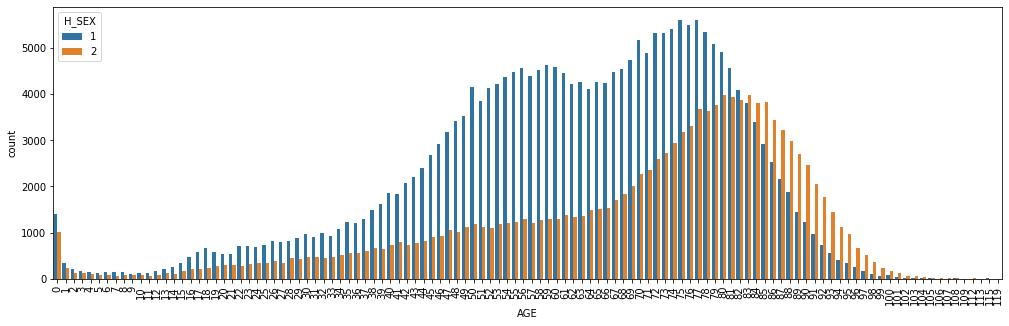

In [135]:
# 나이별로 응급환자...
plt.figure(figsize = (17,5))
sns.countplot(data = df, x='AGE',hue='H_SEX')
plt.xticks(rotation = 90)
plt.show()

In [152]:
# sns.pairplot(data = df, hue='ER_RESULT')
# plt.show()

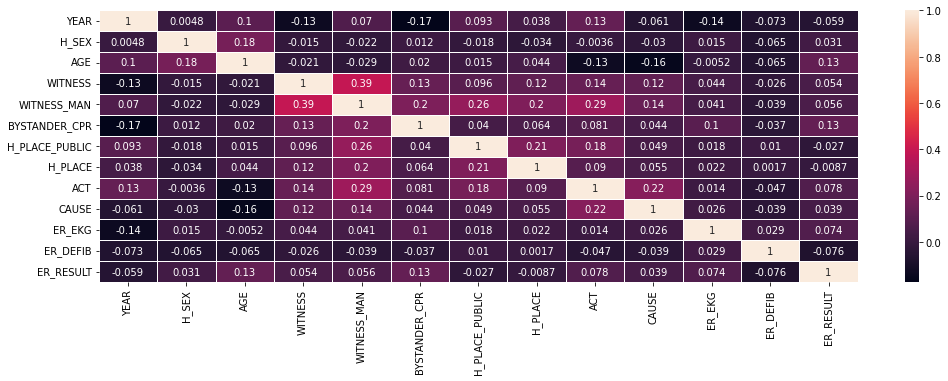

In [156]:
plt.figure(figsize = (17,5))
sns.heatmap(df.corr(),annot=True, linewidths=1)
plt.show()

In [159]:
# 분류모델을 만들기 위해 연도를 빼준다.
df = df.iloc[:,1:]
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [160]:
# 스케일링
from sklearn.preprocessing import RobustScaler
x = RobustScaler().fit_transform(x)
x

array([[-0.38461538, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.80769231,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5       ,  7.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.26923077,  0.        , -0.14285714, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.73076923,  0.        ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.88461538,  0.        , -0.14285714, ...,  0.        ,
         0.        ,  0.        ]])

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32)

In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train), rfc.score(x_test,y_test)

(0.8507689942133232, 0.8509501254458108)

In [168]:
from sklearn.model_selection import cross_val_score
cvc = cross_val_score(rfc,x,y,cv=5)
print(cvc)
cvc.mean()

[0.82364357 0.82364357 0.84517481 0.87991168 0.88166962]


0.8508086518718534

In [ ]:
from sklearn.svm import SVC
svc = SVC()
cvc = cross_val_score(svc,x,y,cv=5)
print(cvc)
cvc.mean()

In [ ]:
# 신경망
# 파이퍼 파라메터
# L = 5 신경망
n_input = 11
n_hidden1 = 1024  
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 1

In [ ]:
from tensorflow as tf

In [ ]:
model = tf.keras.model.Sequencial()
model.add(tf.keras.Dense(n_hidden1, activation='relu', input_shape = (n_input,)))
model.add(tf.keras.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.Dense(n_hidden3, activation='relu'))
model.add(tf.keras.Dense(n_hidden4, activation='relu'))
model.add(tf.keras.Dense(n_output, activation='sigmoid'))
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = 'adam', metrics=['acc'])
model.fit(x_train,y_train, validation_data = (x_test,y_test), batch_size=36, epochs=10)          

In [170]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [167]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355548 entries, 0 to 31416
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   YEAR            355548 non-null  int64
 1   H_SEX           355548 non-null  int64
 2   AGE             355548 non-null  int64
 3   INS             355548 non-null  int64
 4   WITNESS         355548 non-null  int64
 5   WITNESS_MAN     355548 non-null  int64
 6   BYSTANDER_CPR   355548 non-null  int64
 7   H_PLACE_PUBLIC  355548 non-null  int64
 8   H_PLACE         355548 non-null  int64
 9   ACT             355548 non-null  int64
 10  CAUSE           355548 non-null  int64
 11  ER_EKG          355548 non-null  int64
 12  ER_DEFIB        355548 non-null  int64
 13  ER_RESULT       355548 non-null  int64
dtypes: int64(14)
memory usage: 40.7 MB


In [48]:
import numpy as np

In [6]:
# df.ER_RESULT 라벨링  분류
df.ER_RESULT.isnull().sum()

0

In [27]:
temp = df.isnull().sum()
pd.DataFrame(temp[temp>0]).reset_index()

,index,0
0,P_ADMINCODE,769
1,PRE_ER_ARREST_DT,15685
2,PRE_ER_ARREST_TM,15685
3,LAST_NORM_DT,17364
4,LAST_NORM_TM,17364
...,...,...
165,H2_CPC,30957
166,F_AED_EKG,762
167,F_DEFIB,762
168,F_NO_DEFIB,6083


In [28]:
# 결측치 시각화
import matplotlib.pylab as plt
import seaborn as sns

In [29]:
pd.DataFrame(temp[temp>0]).shape

(170, 1)

<AxesSubplot:xlabel='index', ylabel='0'>

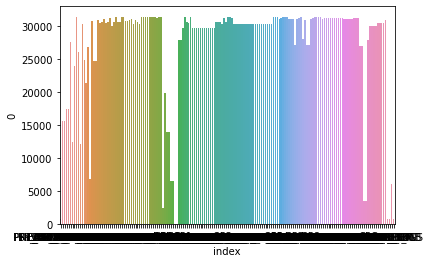

In [30]:
# help(sns.barplot)
sns.barplot(x = pd.DataFrame(temp[temp>0]).reset_index()['index']
            , y=pd.DataFrame(temp[temp>0]).reset_index()[0]
           )

In [45]:
# 결측치는 0으로 채운다
df.head()

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,F_ARREST_DT,F_ARREST_TM,F_CALL_DT,F_CALL_TM,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,2020,11110,서울,종로구,28245.0,인천,계양구,1,70,...,서울,중구,20200129,2042,20200129,2042,40.0,1.0,1.0,3.0
1,2,2020,11110,서울,종로구,11140.0,서울,중구,2,78,...,서울,중구,20200228,1835,20200228,1823,40.0,1.0,1.0,1.0
2,3,2020,11110,서울,종로구,11110.0,서울,종로구,1,78,...,서울,중구,20200302,1213,20200302,1211,50.0,1.0,1.0,1.0
3,4,2020,11110,서울,종로구,11110.0,서울,종로구,2,75,...,서울,종로구,20200419,1725,20200419,1725,40.0,1.0,1.0,3.0
4,5,2020,11110,서울,종로구,11110.0,서울,종로구,1,33,...,서울,중구,20200504,0400,20200504,0410,50.0,1.0,1.0,1.0


In [49]:
np.unique(df.F_DEFIB)

array([ 1.,  2., nan])

In [54]:
df.head(1)

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,F_ARREST_DT,F_ARREST_TM,F_CALL_DT,F_CALL_TM,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,2020,11110,서울,종로구,28245.0,인천,계양구,1,70,...,서울,중구,20200129,2042,20200129,2042,40.0,1.0,1.0,3.0


In [58]:
pd.options.display.max_columns = None  # 모든 컬럼 다 보이기

In [68]:
df.drop(columns=['F_CALL_DT','PRE_ER_ARREST_DT','NUM','YEAR','H_ADD_CITY','H_ADD_DIST','P_ADD_CITY','P_ADD_DIST','F_HAPP_ADD_CITY','F_HAPP_ADD_DIST','DTH_DT','ER_EKG_DT','ER_ADM_DT','STOP_CPR_DT']
        ,inplace=True)

In [77]:
# for name in df.columns:
#     if '_DT' in name:
#         print(name)
DT_lists = [name for name in df.columns if '_DT' in name]
df.drop(columns=DT_lists,inplace=True)

In [86]:
df_corr = df.corr()
df_corr[df_corr>0.8]

,H_ADMINCODE,P_ADMINCODE,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,PRE_ER_ARREST_TM,LAST_NORM_TM,WITNESS_MAN,WITNESS_MAN1,WITNESS_MAN2,BYSTANDER_CPR,BYSTANDER_CPR_ELSE,BYSTANDER_AED,H_PLACE_PUBLIC,H_PLACE1,H_PLACE2,H_PLACE_OTHER,H_PLACE,ACT,ACT_VITAL_ACTIVITY,ACT_OTHER,CAUSE,CAUSE_DISEASE,CAUSE_DISEASE_OTHER,CAUSE_MECH,CAUSE_INTENT,PHX_HTN,PHX_DM,PHX_HEART,PHX_HEART_1,PHX_HEART_2,PHX_HEART_3,PHX_HEART_4,PHX_HEART_5,PHX_HEART_6,PHX_HEART_7,PHX_HEART_8,PHX_HEART_9,PHX_HEART_10,PHX_RENAL,PHX_RENAL_1,PHX_RENAL_2,PHX_RENAL_3,PHX_RENAL_9,PHX_RESPI,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_3,PHX_RESPI_9,PHX_STROKE,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI,PHX_DYSLIPI_1,PHX_DYSLIPI_9,PHX_ALCOHOL,PHX_SMOKE,POISON_0,POISON_1,POISON_2,POISON_3,POISON_4,POISON_5,POISON_6,POISON_7,POISON_8,POISON_9,ER_ADM_TM,CPR,NO_CPR,ROSC,STOP_CPR,STOP_CPR_TM,ER_EKG,ER_EKG_TM,ER_DEFIB,ER_DEFIB_TM,OP1,OP1_1,OP1_2,OP1_3,OP1_9,OP1_PRE_MENTAL,OP1_PRE_MENTAL_TM,OP1_PRE_VITAL_SBP,OP1_PRE_VITAL_DBP,OP1_PRE_VITAL_PR,OP1_PRE_VITAL_RR,OP1_PRE_VITAL_BT,OP1_PRE_VITAL_TM,OP1_START_TM,OP1_END_TM,OP1_SUCCESS,OP2,OP2_1,OP2_2,OP2_3,OP2_4,OP2_9,OP2_PRE_MENTAL,OP2_PRE_MENTAL_TM,OP2_PRE_VITAL_SBP,OP2_PRE_VITAL_DBP,OP2_PRE_VITAL_PR,OP2_PRE_VITAL_RR,OP2_PRE_VITAL_BT,OP2_PRE_VITAL_BT_TM,OP2_TARGET_BT,OP2_START_TM,OP2_TARGET_TM,OP2_REWARM_TM,OP2_NORM_TM,OP2_SUCCESS,OP3,OP3_SURGERY_TM,OP4,OP4_1,OP4_2,OP4_8,OP4_9,OP4_START_TM,OP4_SUCCESS,OP7,OP7_1,OP7_2,OP7_3,OP7_4,OP7_8,OP7_START_TM,OP8,OP8_1,OP8_2,OP8_3,OP8_8,OP8_9,OP8_PRE_ARREST_STATE,OP8_PRE_MENTAL,OP8_PRE_MENTAL_TM,OP8_PRE_VITAL_SBP,OP8_PRE_VITAL_DBP,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_TM,OP8_START_TM,OP8_END_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_TM,ER_RESULT,ER_DC_TM,ADM_RESULT,DTH_TM,CPC,H2_CHART,H2_ER_RESULT,H2_ER_DC_TM,H2_ADM_RESULT,H2_CPC,F_OPEN,F_ADMINCODE,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
H_ADMINCODE,1.000000,0.831565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954746,NaN,NaN,NaN,NaN
P_ADMINCODE,0.831565,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.864050,NaN,NaN,NaN,NaN
H_SEX,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [89]:
'H_ADMINCODE','P_ADMINCODE','F_ADMINCODE'
df.drop(columns=['H_ADMINCODE','P_ADMINCODE','F_ADMINCODE'],inplace=True)

In [90]:
df.head(1)

,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,PRE_ER_ARREST_TM,LAST_NORM_TM,WITNESS_MAN,WITNESS_MAN1,WITNESS_MAN2,BYSTANDER_CPR,BYSTANDER_CPR_ELSE,BYSTANDER_AED,H_PLACE_PUBLIC,H_PLACE1,H_PLACE2,H_PLACE_OTHER,H_PLACE,H_PLACE_FLOOR,ACT,ACT_VITAL_ACTIVITY,ACT_OTHER,CAUSE,CAUSE_DISEASE,CAUSE_DISEASE_OTHER,CAUSE_MECH,CAUSE_INTENT,PHX_HTN,PHX_DM,PHX_HEART,PHX_HEART_1,PHX_HEART_2,PHX_HEART_3,PHX_HEART_4,PHX_HEART_5,PHX_HEART_6,PHX_HEART_7,PHX_HEART_8,PHX_HEART_9,PHX_HEART_10,PHX_RENAL,PHX_RENAL_1,PHX_RENAL_2,PHX_RENAL_3,PHX_RENAL_9,PHX_RESPI,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_3,PHX_RESPI_9,PHX_STROKE,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI,PHX_DYSLIPI_1,PHX_DYSLIPI_9,PHX_ALCOHOL,PHX_SMOKE,POISON_0,POISON_1,POISON_2,POISON_3,POISON_4,POISON_5,POISON_6,POISON_7,POISON_8,POISON_9,ER_ADM_TM,CPR,NO_CPR,ROSC,STOP_CPR,STOP_CPR_TM,ER_EKG,ER_EKG_TM,ER_DEFIB,ER_DEFIB_TM,OP1,OP1_1,OP1_2,OP1_3,OP1_9,OP1_PRE_MENTAL,OP1_PRE_MENTAL_TM,OP1_PRE_VITAL_SBP,OP1_PRE_VITAL_DBP,OP1_PRE_VITAL_PR,OP1_PRE_VITAL_RR,OP1_PRE_VITAL_BT,OP1_PRE_VITAL_TM,OP1_START_TM,OP1_END_TM,OP1_SUCCESS,OP2,OP2_1,OP2_2,OP2_3,OP2_4,OP2_9,OP2_PRE_MENTAL,OP2_PRE_MENTAL_TM,OP2_PRE_VITAL_SBP,OP2_PRE_VITAL_DBP,OP2_PRE_VITAL_PR,OP2_PRE_VITAL_RR,OP2_PRE_VITAL_BT,OP2_PRE_VITAL_BT_TM,OP2_TARGET_BT,OP2_START_TM,OP2_TARGET_TM,OP2_REWARM_TM,OP2_NORM_TM,OP2_SUCCESS,OP3,OP3_SURGERY_TM,OP4,OP4_1,OP4_2,OP4_8,OP4_9,OP4_START_TM,OP4_SUCCESS,OP7,OP7_1,OP7_2,OP7_3,OP7_4,OP7_8,OP7_START_TM,OP8,OP8_1,OP8_2,OP8_3,OP8_8,OP8_9,OP8_PRE_ARREST_STATE,OP8_PRE_MENTAL,OP8_PRE_MENTAL_TM,OP8_PRE_VITAL_SBP,OP8_PRE_VITAL_DBP,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_TM,OP8_START_TM,OP8_END_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_TM,ER_RESULT,ER_DC_TM,ADM_RESULT,DTH_TM,CPC,H2_CHART,H2_ER_RESULT,H2_ER_DC_TM,H2_ADM_RESULT,H2_CPC,F_OPEN,F_ARREST_TM,F_CALL_TM,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,70,1,2,2,2042.0,NaN,1,1.0,NaN,8,NaN,NaN,2,NaN,6.0,NaN,8,NaN,8,NaN,NaN,1,4.0,NaN,NaN,NaN,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2101,3.0,NaN,2.0,2.0,2131.0,9,2101.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,407,NaN,341.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2042,2042,40.0,1.0,1.0,3.0


In [91]:
TM_lists = [name for name in df.columns if '_TM' in name]
df.drop(columns=TM_lists, inplace=True)

In [92]:
df.head(1)

,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,WITNESS_MAN,WITNESS_MAN1,WITNESS_MAN2,BYSTANDER_CPR,BYSTANDER_CPR_ELSE,BYSTANDER_AED,H_PLACE_PUBLIC,H_PLACE1,H_PLACE2,H_PLACE_OTHER,H_PLACE,H_PLACE_FLOOR,ACT,ACT_VITAL_ACTIVITY,ACT_OTHER,CAUSE,CAUSE_DISEASE,CAUSE_DISEASE_OTHER,CAUSE_MECH,CAUSE_INTENT,PHX_HTN,PHX_DM,PHX_HEART,PHX_HEART_1,PHX_HEART_2,PHX_HEART_3,PHX_HEART_4,PHX_HEART_5,PHX_HEART_6,PHX_HEART_7,PHX_HEART_8,PHX_HEART_9,PHX_HEART_10,PHX_RENAL,PHX_RENAL_1,PHX_RENAL_2,PHX_RENAL_3,PHX_RENAL_9,PHX_RESPI,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_3,PHX_RESPI_9,PHX_STROKE,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI,PHX_DYSLIPI_1,PHX_DYSLIPI_9,PHX_ALCOHOL,PHX_SMOKE,POISON_0,POISON_1,POISON_2,POISON_3,POISON_4,POISON_5,POISON_6,POISON_7,POISON_8,POISON_9,CPR,NO_CPR,ROSC,STOP_CPR,ER_EKG,ER_DEFIB,OP1,OP1_1,OP1_2,OP1_3,OP1_9,OP1_PRE_MENTAL,OP1_PRE_VITAL_SBP,OP1_PRE_VITAL_DBP,OP1_PRE_VITAL_PR,OP1_PRE_VITAL_RR,OP1_PRE_VITAL_BT,OP1_SUCCESS,OP2,OP2_1,OP2_2,OP2_3,OP2_4,OP2_9,OP2_PRE_MENTAL,OP2_PRE_VITAL_SBP,OP2_PRE_VITAL_DBP,OP2_PRE_VITAL_PR,OP2_PRE_VITAL_RR,OP2_PRE_VITAL_BT,OP2_TARGET_BT,OP2_SUCCESS,OP3,OP4,OP4_1,OP4_2,OP4_8,OP4_9,OP4_SUCCESS,OP7,OP7_1,OP7_2,OP7_3,OP7_4,OP7_8,OP8,OP8_1,OP8_2,OP8_3,OP8_8,OP8_9,OP8_PRE_ARREST_STATE,OP8_PRE_MENTAL,OP8_PRE_VITAL_SBP,OP8_PRE_VITAL_DBP,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_SUCCESS,OP8_ROSC,ER_RESULT,ADM_RESULT,CPC,H2_CHART,H2_ER_RESULT,H2_ADM_RESULT,H2_CPC,F_OPEN,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,70,1,2,2,1,1.0,NaN,8,NaN,NaN,2,NaN,6.0,NaN,8,NaN,8,NaN,NaN,1,4.0,NaN,NaN,NaN,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,1,40.0,1.0,1.0,3.0


In [97]:
len(df.columns)//5

27

In [107]:
# 결측치가 없는 컬럼만 추출
temp = df.isnull().sum()
temp[temp==0].index
lastdf = df.loc[:,temp[temp==0].index]

In [108]:
lastdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31417 entries, 0 to 31416
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   H_SEX           31417 non-null  int64
 1   AGE             31417 non-null  int64
 2   INS             31417 non-null  int64
 3   PRE_ER_ROSC     31417 non-null  int64
 4   WITNESS         31417 non-null  int64
 5   WITNESS_MAN     31417 non-null  int64
 6   BYSTANDER_CPR   31417 non-null  int64
 7   H_PLACE_PUBLIC  31417 non-null  int64
 8   H_PLACE         31417 non-null  int64
 9   ACT             31417 non-null  int64
 10  CAUSE           31417 non-null  int64
 11  PHX_HTN         31417 non-null  int64
 12  PHX_DM          31417 non-null  int64
 13  PHX_HEART       31417 non-null  int64
 14  PHX_RENAL       31417 non-null  int64
 15  PHX_RESPI       31417 non-null  int64
 16  PHX_STROKE      31417 non-null  int64
 17  PHX_DYSLIPI     31417 non-null  int64
 18  PHX_ALCOHOL     31417 non-

In [111]:
lastdf.describe()

,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,WITNESS_MAN,BYSTANDER_CPR,H_PLACE_PUBLIC,H_PLACE,ACT,CAUSE,PHX_HTN,PHX_DM,PHX_HEART,PHX_RENAL,PHX_RESPI,PHX_STROKE,PHX_DYSLIPI,PHX_ALCOHOL,PHX_SMOKE,ER_EKG,ER_DEFIB,ER_RESULT,F_OPEN
count,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000
mean,1.362097,66.990292,1.781965,1.923672,1.916319,3.798931,6.608269,3.300029,7.074673,50.963841,1.271318,5.973231,6.658020,7.075437,7.850686,7.820097,7.676640,7.993920,8.427667,8.614349,4.927842,1.113665,37.694719,1.024254
std,0.480614,18.560596,1.976325,0.265527,1.727939,3.214337,3.318592,2.927069,3.135677,44.760498,0.785242,3.799428,3.542027,3.315479,2.672806,2.707079,2.848813,2.512205,2.013023,1.628010,2.129104,0.317408,5.229332,0.153840
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000
25%,1.000000,56.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,8.000000,7.000000,1.000000,1.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
50%,1.000000,71.000000,1.000000,2.000000,2.000000,2.000000,9.000000,2.000000,9.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
75%,2.000000,81.000000,1.000000,2.000000,2.000000,9.000000,9.000000,2.000000,9.000000,99.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
max,2.000000,104.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,99.000000,2.000000


<AxesSubplot:>

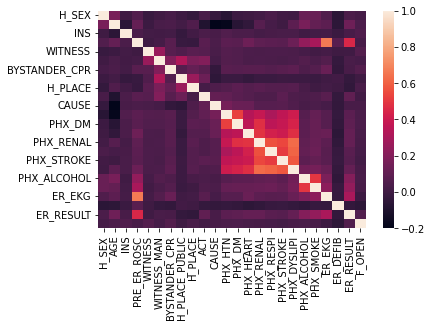

In [112]:
sns.heatmap(lastdf.corr())

In [116]:
np.unique(lastdf.ER_RESULT)

array([10, 21, 22, 30, 40, 41, 88, 99], dtype=int64)

In [117]:
y = lastdf.loc[:,'ER_RESULT']

In [119]:
x = lastdf.drop(columns=['ER_RESULT'])

In [120]:
x.shape, y.shape

((31417, 23), (31417,))

In [197]:
print(np.unique(y))
list(range(len(np.unique(y))))
temp = dict(zip(np.unique(y),range(len(np.unique(y)))) )
y = y.replace(temp)
# y를 one hot
y = tf.keras.utils.to_categorical(y,8)

[0 1 2 3 4 5 6 7]


In [198]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [129]:
# 이상치 유무 확인 시각화

In [199]:
# 데이터 표준화는 이상치에 영향을 안받는 RobustScaler를 사용 ( 중위수,  사분위수)
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_rs = rs.fit_transform(x)

In [200]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)

In [201]:
# 평균 cross validation
from sklearn.model_selection import cross_val_score
rfc_cossval =  cross_val_score(rfc,x_rs,y)
rfc_cossval.mean()

0.8442261878288366

In [202]:
# 신경망 =  다층 퍼셉트론
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [203]:
x_rs.shape

(31417, 23)

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_rs,y,random_state=32)

In [205]:
# 신경망 설계
model = Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(23,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))         

In [211]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'], optimizer = 'adam'
             )
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10)
]

In [212]:
model.fit(x_train,y_train,batch_size=32, epochs=200,validation_data=(x_test,y_test)
          ,callbacks=callbacks)

Epoch 1/200
737/737 [==============================] - 2s 2ms/step - loss: 0.2654 - accuracy: 0.9092 - val_loss: 0.5784 - val_accuracy: 0.8639
Epoch 2/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9107 - val_loss: 0.5875 - val_accuracy: 0.8598
Epoch 3/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.9119 - val_loss: 0.6055 - val_accuracy: 0.8578
Epoch 4/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2550 - accuracy: 0.9126 - val_loss: 0.5921 - val_accuracy: 0.8560
Epoch 5/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.9126 - val_loss: 0.6202 - val_accuracy: 0.8541
Epoch 6/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9133 - val_loss: 0.6316 - val_accuracy: 0.8629
Epoch 7/200
737/737 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.9157 - val_loss: 0.6214 - val_accuracy: 0.8537

In [213]:
model.evaluate(x_test,y_test)

246/246 [==============================] - 0s 1ms/step - loss: 0.6713 - accuracy: 0.8540


[0.6713192462921143, 0.8539783358573914]

In [214]:
#예측치  
predict_test = np.argmax(model.predict(x_test),axis=1)

246/246 [==============================] - 0s 867us/step


In [215]:
len(predict_test), x_test.shape

(7855, (7855, 23))

In [216]:
# cnn 적용 ccpd ccpd f fc d fc
cnn_model = Sequential()
cnn_model.add(layers.Conv1D(32,3,activation='relu', input_shape=(23,1)))
cnn_model.add(layers.Conv1D(64,3,activation='relu'))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Conv1D(32,3,activation='relu'))
cnn_model.add(layers.Conv1D(64,3,activation='relu'))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())
# FC 층
cnn_model.add(layers.Dense(64,activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(8,activation='softmax'))              

In [217]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5)
]
cnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'], optimizer = 'adam'
             )
hist = cnn_model.fit(x_train,y_train,batch_size=32, epochs=200,validation_data=(x_test,y_test)
          ,callbacks=callbacks,verbose=2
                )

Epoch 1/200
737/737 - 4s - loss: 0.6476 - accuracy: 0.8054 - val_loss: 0.5284 - val_accuracy: 0.8173 - 4s/epoch - 5ms/step
Epoch 2/200
737/737 - 3s - loss: 0.5329 - accuracy: 0.8282 - val_loss: 0.4678 - val_accuracy: 0.8480 - 3s/epoch - 4ms/step
Epoch 3/200
737/737 - 3s - loss: 0.4936 - accuracy: 0.8493 - val_loss: 0.4423 - val_accuracy: 0.8637 - 3s/epoch - 4ms/step
Epoch 4/200
737/737 - 3s - loss: 0.4766 - accuracy: 0.8578 - val_loss: 0.4446 - val_accuracy: 0.8635 - 3s/epoch - 4ms/step
Epoch 5/200
737/737 - 3s - loss: 0.4676 - accuracy: 0.8567 - val_loss: 0.4317 - val_accuracy: 0.8651 - 3s/epoch - 5ms/step
Epoch 6/200
737/737 - 2s - loss: 0.4600 - accuracy: 0.8611 - val_loss: 0.4314 - val_accuracy: 0.8666 - 2s/epoch - 3ms/step
Epoch 7/200
737/737 - 3s - loss: 0.4596 - accuracy: 0.8600 - val_loss: 0.4280 - val_accuracy: 0.8684 - 3s/epoch - 4ms/step
Epoch 8/200
737/737 - 3s - loss: 0.4564 - accuracy: 0.8613 - val_loss: 0.4371 - val_accuracy: 0.8651 - 3s/epoch - 4ms/step
Epoch 9/200
737/

In [218]:
cnn_model.evaluate(x_test,y_test)

246/246 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8696


[0.4172476530075073, 0.8696371912956238]

In [226]:
# 평가 confusion matrix
# 의료용 : 특이도, 정밀도
from sklearn.metrics import confusion_matrix
cnn_model_predic = cnn_model.predict(x_test)
cnn_model_predic = np.argmax(cnn_model_predic,axis=1)
print(cnn_model_predic)
print(np.argmax(y_test,axis=1))  # y_test는 one hot으로 변경되었기 때문에 해당 레이블을 max의 인덱스로 디코딩
cm = confusion_matrix(np.argmax(y_test,axis=1),cnn_model_predic)

246/246 [==============================] - 0s 2ms/step
[4 4 4 ... 4 4 3]
[4 4 4 ... 4 4 3]


In [227]:
cm

array([[   0,    0,    0,    8,    2,    0,    0,    0],
       [   0,    0,    0,   94,  273,    0,    0,    0],
       [   0,    0,    0,    0,    3,    0,    0,    0],
       [   0,    0,    0,  514,  551,    0,    0,    0],
       [   0,    0,    0,   87, 6317,    0,    0,    0],
       [   0,    0,    0,    3,    0,    0,    0,    0],
       [   0,    0,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0]], dtype=int64)

In [228]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
# precision_score 정밀도  
# recall_score 재현율
# 정밀도와 재현율을 trade-off 관계

In [232]:
# print(f"정밀도 {precision_score(np.argmax(y_test,axis=1),cnn_model_predic)}")
# print(f"재현율 {recall_score(np.argmax(y_test,axis=1),cnn_model_predic)}")
np.argmax(y_test,axis=1), cnn_model_predic

(array([4, 4, 4, ..., 4, 4, 3], dtype=int64),
 array([4, 4, 4, ..., 4, 4, 3], dtype=int64))

In [233]:
# 추가로 해볼수 있는것... 데이터에서 
# 1 범주형 데이터를 one-hot
# 2. 사망과 그외를 나눠서.. 이진 분류로 수행